In [1]:
!pip install keras tensorflow numpy mnist


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
import mnist
import matplotlib.pyplot as plt

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

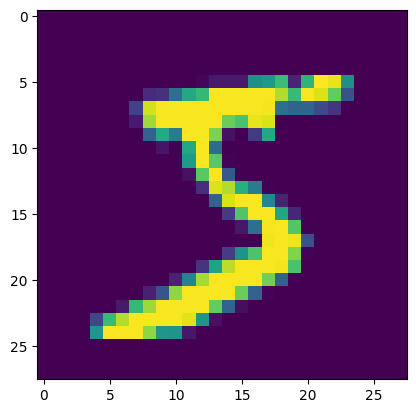

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

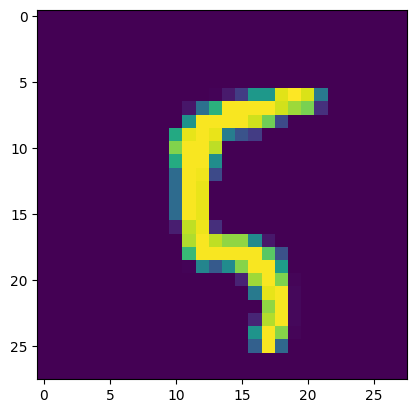

In [5]:
plt.imshow(train_images[100])

In [6]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

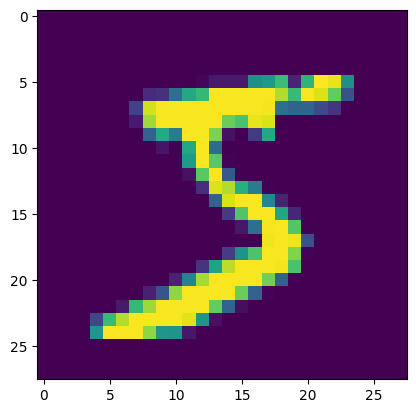

In [8]:
plt.imshow(train_images[0])

In [9]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
#print(train_images.shape)
#print(test_images.shape)

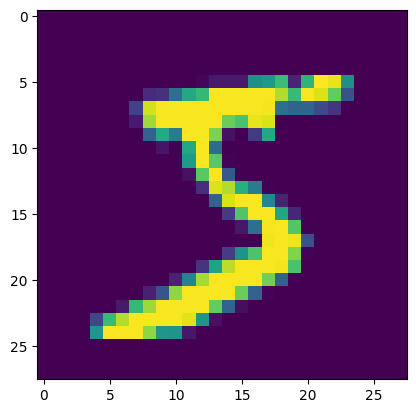

In [10]:
plt.imshow(train_images[0])

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
num_filters = 8
filter_size = 3
pool_size = 2


In [13]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])


In [14]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [15]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)


Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3398 - accuracy: 0.9034 - val_loss: 0.1956 - val_accuracy: 0.9421
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1558 - accuracy: 0.9551 - val_loss: 0.1275 - val_accuracy: 0.9640
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1175 - accuracy: 0.9663 - val_loss: 0.1044 - val_accuracy: 0.9680


In [16]:
# Save the model to disk.
model.save_weights('cnn.h5')


In [17]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])


1/1 [==============================] - 0s 128ms/step


In [18]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1))


[7 2 1 0 4]


In [19]:
# Check our predictions against the ground truths.
print(test_labels[:5])


[7 2 1 0 4]
